In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis/sentiment_analysis.csv
/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv


In [3]:
df=pd.read_csv('/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv') 


In [4]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [5]:
df['text']=df['Review']+' '+df['Summary']
df = df[df['Sentiment']!='neutral']# Data is too small



In [6]:
df['sentiment']=df['Sentiment']

In [7]:
df['sentiment'].value_counts()

sentiment
positive    166581
negative     28232
Name: count, dtype: int64

In [8]:
df_copy = pd.DataFrame({'text': df['text'], 'sentiment': df['sentiment']})


In [9]:
df_copy.head()

,text,sentiment
0,super! great cooler excellent air flow and for...,positive
1,awesome best budget 2 fit cooler nice cooling,positive
2,fair the quality is good but the power of air ...,positive
3,useless product very bad product its a only a fan,negative
5,awesome the cooler is really fantastic and pro...,positive


In [10]:
def color_sentiment(value):
    if value == 'positive':
        return 'color: green;'
    elif value == 'negative':
        return 'color: red;'
    else:
        return 'color: gray;'


In [11]:
styled_df = df_copy.head(10).style.applymap(color_sentiment, subset=['sentiment'])
styled_df


<ipython-input-11-ac7c3954a43f>:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_copy.head(10).style.applymap(color_sentiment, subset=['sentiment'])


,text,sentiment
0,super! great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,awesome best budget 2 fit cooler nice cooling,positive
2,fair the quality is good but the power of air is decent,positive
3,useless product very bad product its a only a fan,negative
5,awesome the cooler is really fantastic and provides good air flow highly recommended,positive
6,highly recommended very good product,positive
7,nice very nice,positive
8,unsatisfactory very bad cooler,negative
9,worth the money very good,positive
10,great product beautiful product good material and perfectly working,positive


# EDA

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194813 entries, 0 to 205050
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       171572 non-null  object
 1   sentiment  194813 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


In [13]:
df_copy.isna().sum()

text         23241
sentiment        0
dtype: int64

In [14]:
df_copy=df_copy.dropna()

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171572 entries, 0 to 205050
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       171572 non-null  object
 1   sentiment  171572 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [16]:
df_copy.duplicated().sum()

75385

In [17]:
df_copy = df_copy.drop_duplicates()


In [18]:
# Display rows that are duplicated
duplicated_rows = df_copy[df_copy.duplicated()]
print(duplicated_rows)


Empty DataFrame
Columns: [text, sentiment]
Index: []


In [19]:
df_copy.nunique()

text         96094
sentiment        2
dtype: int64

In [20]:
df_copy['sentiment'].value_counts()

sentiment
positive    77017
negative    19170
Name: count, dtype: int64

In [21]:
def clean_data(data):
    cleaned_df = data.copy()
    # Strip whitespace from text column
    cleaned_df['text'] = cleaned_df['text'].str.strip()
    # Convert sentiment to lowercase for consistency
    cleaned_df['sentiment'] = cleaned_df['sentiment'].str.lower()
    # Remove rows where text is empty after stripping
    cleaned_df = cleaned_df[cleaned_df['text'].str.len() > 0]
    # Reset index after cleaning
    cleaned_df = cleaned_df.reset_index(drop=True)
    return cleaned_df


In [22]:
cleaned_df=clean_data(df_copy)

# visualization

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sentiment_counts = cleaned_df['sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6)) 
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() +p.get_width() / 2., p.get_height()),ha='center', va='center', fontsize=12,color='black', xytext=(0, 5),textcoords='offset points')

 # Filter for positive sentiments

In [ ]:
from wordcloud import WordCloud, STOPWORDS
positive_reviews = cleaned_df[cleaned_df['sentiment'] == 'positive']

In [ ]:
# Combine all positive reviews into a single string
positive_text = " ".join(positive_reviews['text'])

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Word Cloud for Positive Sentiments') 
plt.show()


# for negative

In [ ]:
negative_reviews = cleaned_df[cleaned_df['sentiment'] == 'negative']
negative_text = " ".join(negative_reviews['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_text)
# Display the word cloud
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Word Cloud for Negative Sentiments') 
plt.show()


# data transformation

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Download required NLTK data 
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('wordnet') 
nltk.download('punkt_tab')

In [ ]:
def convert_to_lowercase(df):
    """ Convert text to lowercase""" 
    df['text'] = df['text'].str.lower() 
    return df

In [ ]:
cleaned_df=convert_to_lowercase(cleaned_df)

cleaned_df

In [ ]:


def remove_special_characters(df):
    """ Remove special characters and numbers"""
    df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    return df
    
    

In [ ]:
cleaned_df=remove_special_characters(cleaned_df)
cleaned_df

In [ ]:
#check if there are urls
cleaned_df['has_url'] = cleaned_df['text'].apply(lambda x: bool(re.search(r'http\S+|www\.\S+', x)) if isinstance(x, str) else False)
cleaned_df

In [ ]:
cleaned_df['has_url'].value_counts()

In [ ]:
cleaned_df[cleaned_df['has_url']==True]

In [ ]:
def remove_urls(df): 
    """Remove URLs""" 
    df['text_no_urls'] = df['text'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x)) 
    return df

In [ ]:
cleaned_df=remove_urls(cleaned_df)

In [ ]:
cleaned_df[cleaned_df['has_url']==True]
#There are no more URLs in the text_no_urls column


In [ ]:

cleaned_df.drop('text',axis=1,inplace=True)

In [ ]:
cleaned_df.drop('has_url',axis=1,inplace=True)


In [ ]:
cleaned_df

In [ ]:
def remove_extra_whitespace(df):
    """Remove extra whitespace"""
    df['text_stripped'] = df['text_no_urls'].apply(lambda x:' '.join(x.split()))
    return df

In [ ]:
cleaned_df = remove_extra_whitespace(cleaned_df)

In [ ]:
cleaned_df

In [ ]:
cleaned_df.drop('text_no_urls',axis=1,inplace=True)


tokenization is a crucial step in NLP sentiment analysis as it prepares the text data for further processing and analysis by breaking it down into meaningful units, enabling subsequent NLP tasks, and providing features for machine learning models.

In [ ]:
def tokenize_text(df):
    """Tokenization"""
    df['tokens'] = df['text_stripped'].apply(word_tokenize)
    return df

In [ ]:
cleaned_df = tokenize_text(cleaned_df)

In [ ]:
cleaned_df

In [ ]:
cleaned_df.drop('text_stripped',axis=1,inplace=True)


In [ ]:
def remove_stopwords(df): 
    """Remove stopwords""" 
    stop_words = set(stopwords.words('english')) 
    df['tokens_no_stop'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words]) 
    return df
    

In [ ]:
cleaned_df = remove_stopwords(cleaned_df) 
cleaned_df.head()

In [ ]:
import nltk
from nltk.corpus import wordnet
import os

In [ ]:
nltk.download('wordnet')    

In [ ]:
import nltk
import os

# Ensure NLTK data path is set
nltk.data.path.append('/kaggle/working/nltk_data')

In [ ]:
# Re-download the WordNet corpus
nltk.download('wordnet', download_dir='/kaggle/working/nltk_data/')
nltk.download('omw-1.4', download_dir='/kaggle/working/nltk_data/')

In [ ]:
import zipfile
import os

# Chemin des fichiers .zip téléchargés
wordnet_zip_path = '/kaggle/working/nltk_data/corpora/wordnet.zip'
omw_zip_path = '/kaggle/working/nltk_data/corpora/omw-1.4.zip'

# Chemin d'extraction
extracted_wordnet_path = '/kaggle/working/nltk_data/corpora/wordnet'
extracted_omw_path = '/kaggle/working/nltk_data/corpora/omw-1.4'

# Fonction pour extraire les fichiers .zip
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extraire les fichiers .zip si nécessaire
if not os.path.exists(extracted_wordnet_path):
    print(f"Extraction de {wordnet_zip_path}...")
    extract_zip(wordnet_zip_path, extracted_wordnet_path)

if not os.path.exists(extracted_omw_path):
    print(f"Extraction de {omw_zip_path}...")
    extract_zip(omw_zip_path, extracted_omw_path)

# Vérifier l'existence des fichiers extraits
if os.path.exists(extracted_wordnet_path):
    print(f"WordNet extrait et disponible à : {extracted_wordnet_path}")
else:
    print("Erreur : WordNet non extrait correctement.")

if os.path.exists(extracted_omw_path):
    print(f"OMW extrait et disponible à : {extracted_omw_path}")
else:
    print("Erreur : OMW non extrait correctement.")


In [ ]:
import shutil
import os

# Chemin du répertoire source et destination
source_directory = '/kaggle/working/nltk_data/corpora/wordnet/wordnet'
destination_directory = '/kaggle/working/nltk_data/corpora/wordnet'

# Vérifier si le répertoire source existe
if os.path.exists(source_directory):
    # Parcourir tous les fichiers dans le répertoire source
    for filename in os.listdir(source_directory):
        source_file = os.path.join(source_directory, filename)
        destination_file = os.path.join(destination_directory, filename)
        
        # Vérifier si c'est un fichier (et non un sous-dossier)
        if os.path.isfile(source_file):
            # Déplacer chaque fichier
            shutil.move(source_file, destination_file)
            print(f"Le fichier {filename} a été déplacé vers : {destination_file}")
else:
    print(f"Erreur : Le répertoire source {source_directory} n'existe pas.")


In [ ]:
def lemmatize_text(df):
    """Lemmatize tokens after ensuring WordNet corpus is downloaded."""
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Apply lemmatization
    df['lemmatized'] = df['tokens_no_stop'].apply(
        lambda x: [lemmatizer.lemmatize(word) for word in x]
    )
    return df

cleaned_df=lemmatize_text(cleaned_df)


In [ ]:
cleaned_df

In [ ]:
def join_tokens(df): 
    """ Join tokens back to text""" 
    df['processed_text'] = df['lemmatized'].apply(lambda x: ' '.join(x)) 
    return df 
cleaned_df = join_tokens(cleaned_df) 
cleaned_df.head()

In [ ]:
# #Machine Learning Models Require Numerical Input:
# def encode_labels(df): 
#     "" "Encode sentiment labels""" 
#     le = LabelEncoder() 
#     df['sentiment_encoded'] = le.fit_transform(df['sentiment']) 
#     return df, le 
# cleaned_df, label_encoder = encode_labels(cleaned_df) 
# cleaned_df.head()

0:negative


1:neutral


2: positive

In [ ]:
def create_tfidf(df, max_features=5000): 
    """TF-IDF Vectorization""" 
    tfidf = TfidfVectorizer(max_features=max_features) 
    tfidf_matrix = tfidf.fit_transform(df['processed_text']) 
    return tfidf_matrix, tfidf 
tfidf_matrix, tfidf_vectorizer = create_tfidf(cleaned_df) 
cleaned_df.head()


In [ ]:
# #  TF (Term Frequency): How often a word appears within a single document.  
# # IDF (Inverse Document Frequency): Measures how rare a word is across the entire corpus of documents.
# TF-IDF is a crucial technique in machine learning for effectively handling text data. 
# By converting text into meaningful numerical representations, 
# it enables the application of various machine learning models to solve a wide range of NLP problems.

# model

In [ ]:
import torch 
from torch.utils.data import Dataset, DataLoader 
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

def create_balanced_dataset(df, n_samples=39000):
    """
    Create a balanced dataset with the specified number of samples for each sentiment class.

    Parameters:
    - df: DataFrame containing the sentiment data with 'sentiment' column.
    - n_samples: Total number of samples to generate (default is 5000).

    Returns:
    - A balanced DataFrame with the specified number of samples per class.
    """
    # Convert sentiment to numeric
    sentiment_map = {'negative': 0, 'positive': 1}
    df['label'] = df['sentiment'].map(sentiment_map)

    # Calculate samples per class
    samples_per_class = n_samples // 2

    # Get balanced data for each class
    balanced_dfs = []
    for label in range(2):
        class_df = df[df['label'] == label]
        
        # If we have more samples than required, perform downsampling
        if len(class_df) > samples_per_class:
            balanced_dfs.append(class_df.sample(n=samples_per_class, random_state=42))
        else:
            # If we don't have enough samples, perform oversampling
            balanced_dfs.append(class_df.sample(n=samples_per_class, replace=True, random_state=42))

    # Combine balanced datasets
    balanced_df = pd.concat(balanced_dfs)

    # Shuffle the final dataset
    return balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
cleaned_df=create_balanced_dataset(cleaned_df)

In [ ]:
cleaned_df

In [ ]:
cleaned_df['sentiment'].value_counts()

## split data

In [ ]:
final_data = cleaned_df[['processed_text', 'label']]


In [ ]:
final_data.head()

In [ ]:
train_dff, test_dff = train_test_split(final_data, test_size=0.2, random_state=42, shuffle=True, stratify=final_data['label'])


In [ ]:
# Get texts and labels
train_texts = train_dff['processed_text'].tolist() 
train_labels = train_dff['label'].tolist() 
test_texts = test_dff['processed_text'].tolist() 
test_labels = test_dff['label'].tolist()

In [ ]:
train_texts[700]

In [ ]:
train_labels[00]

In [ ]:
# #Si vous avez déjà utilisé TF-IDF pour transformer vos textes en vecteurs numériques, 
# vous pouvez continuer avec des modèles comme Logistic Regression, SVM, ou Naive Bayes pour la classification des sentiments.
# Si vous souhaitez utiliser un modèle LSTM, 
# vous devrez plutôt utiliser un tokenizer Keras pour transformer les textes en séquences de mots.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
# Tokenisation and padding sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_texts)
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

In [80]:

X_train_seq = tokenizer.texts_to_sequences(train_texts)
X_test_seq = tokenizer.texts_to_sequences(test_texts)

X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Convertir les labels en one-hot encoding
y_train = np.array(train_labels)
y_test = np.array(test_labels)

y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

#calculate weights to equilibrate the data 
class_weights = compute_class_weight(class_weight='balanced', 
                                     classes=np.unique(y_train), 
                                     y=y_train)
class_weight_dict = dict(enumerate(class_weights))

#create lstm model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))  # Retirer input_length, c'est obsolète
model.add(LSTM(64, return_sequences=False))  # Réduire la taille de LSTM
model.add(Dropout(0.3))  # Augmenter le dropout

# dense 
model.add(Dense(64, activation='relu'))  # Augmenter la taille de la couche dense
model.add(Dropout(0.5))  # Augmenter le dropout

#output layer
model.add(Dense(3, activation='softmax'))  # softmax pour la classification multiclasse

# Compilation model
optimizer = Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train model
history = model.fit(X_train_pad, y_train_onehot, epochs=100, batch_size=16, 
                    validation_data=(X_test_pad, y_test_onehot), 
                    callbacks=[early_stopping], verbose=1,
                    class_weight=class_weight_dict)  # Ajout des poids de classe


1950/1950 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9306 - loss: 0.2086 - val_accuracy: 0.9300 - val_loss: 0.1868
Epoch 13/100
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9356 - loss: 0.1966 - val_accuracy: 0.9323 - val_loss: 0.1858
Epoch 14/100
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9361 - loss: 0.1878 - val_accuracy: 0.9315 - val_loss: 0.1817
Epoch 15/100
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9468 - loss: 0.1617 - val_accuracy: 0.9356 - val_loss: 0.1749
Epoch 21/100
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9456 - loss: 0.1661 - val_accuracy: 0.9364 - val_loss: 0.1730
Epoch 22/100
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9450 - loss: 0.1638 - val_accuracy: 0.9358 - val_loss: 0.1742
Epoch 23/100
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9470 - loss: 0.1574 - val_accuracy: 0.9374 - val_loss: 0.1731
Epoch 24/100
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9493 - loss

In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (16, 100, 128)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (16, 64)                    │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (16, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (16, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (16, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (16, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081,291 (7.94 MB)

 Trainable params: 693,763 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,528 (5.29 MB)

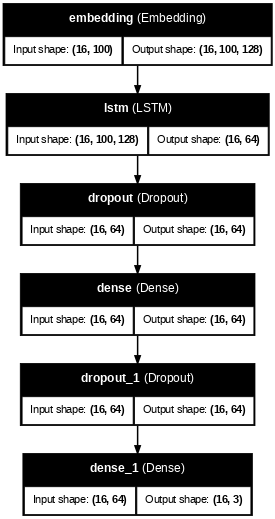

In [82]:
!pip install pydot

from keras.utils import plot_model

plot_model(model=model, show_shapes=True, dpi=54, show_layer_names=True)

In [83]:
print(X_train_pad.shape)  
print(X_test_pad.shape)   



(31200, 100)
(7800, 100)


In [84]:
train_dff["label"].value_counts()

label
1    15600
0    15600
Name: count, dtype: int64

In [85]:
# Evaluate du model
loss, accuracy = model.evaluate(X_test_pad, y_test_onehot)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9439 - loss: 0.1626
Test loss: 0.16976460814476013
Test accuracy: 0.9385897517204285


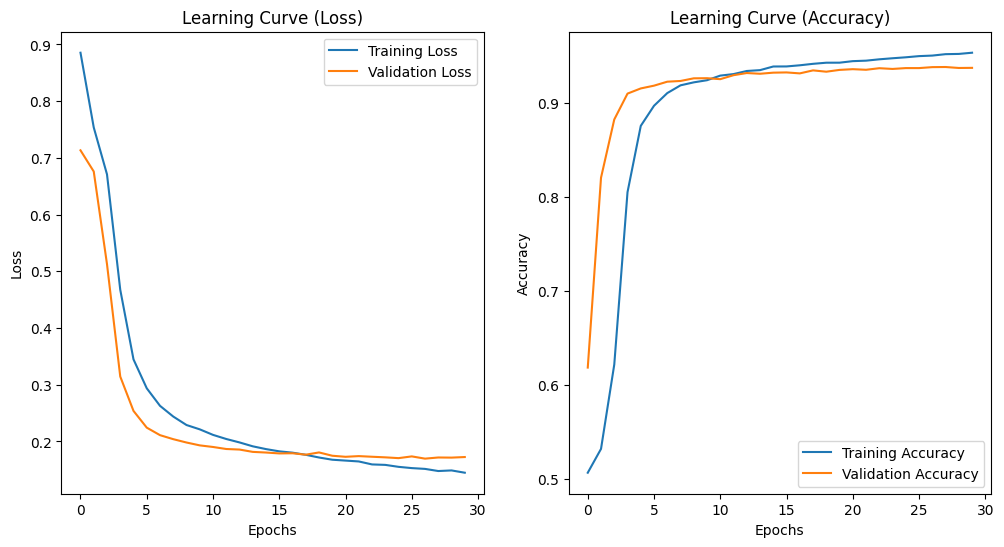

In [86]:

#learning curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de l'exactitude
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




In [87]:
import numpy as np


def predict_sentiment(texts, tokenizer, model, max_len=100):
    # Tokenisation text
    sequences = tokenizer.texts_to_sequences(texts)
    
    # Padding 
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    
    
    predictions = model.predict(padded_sequences)
    
    # Conversion predicted label
    predicted_labels = np.argmax(predictions, axis=1)
    
    return predicted_labels



In [88]:
#some examples
new_texts = ["excellent!!","waste money","bad","wonderful ","expensive","worste","funny","nice","beautiful","dont like it","just wow","low sound","must try"]
predicted_sentiments = predict_sentiment(new_texts, tokenizer, model)

#results
sentiment_map = {0: 'negative', 1:'positive'}
predicted_sentiments_labels = [sentiment_map[label] for label in predicted_sentiments]
print(predicted_sentiments_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
['positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive']


In [89]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test_pad)

y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test_onehot, axis=1), y_pred_labels))


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3900
           1       0.94      0.93      0.94      3900

    accuracy                           0.94      7800
   macro avg       0.94      0.94      0.94      7800
weighted avg       0.94      0.94      0.94      7800



244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


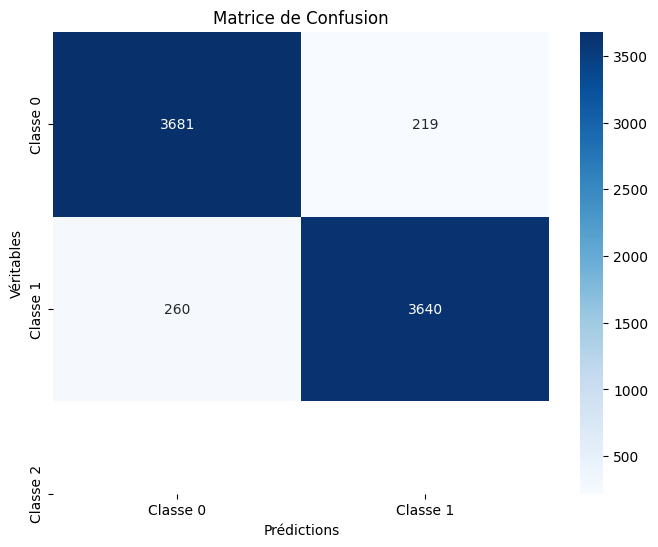

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(np.argmax(y_test_onehot, axis=1), y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.title('Matrice de Confusion')
plt.show()


In [91]:
from tensorflow.keras.models import Sequential

# Sauvegarder le modèle
model.save('sentiment_analysis_model.h5')
print("Modèle sauvegardé avec succès !")


Modèle sauvegardé avec succès !
